In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Preparing the data

In [ ]:
#load the dataset
!pip3 install gdown
!gdown https://drive.google.com/uc?id=1-jrCS61Ru-fRWUe46ot5ZvHNOsagm3eF
!unzip /content/face_mask.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
import os
dir = 'Face Mask Dataset/'
train_dir = dir+"Train/"
test_dir = dir+"Test/"
val_dir = dir+"Validation/"

print('num_of_classes: {} /'.format(len(os.listdir(train_dir))),
      'name_of_classes: {}'.format(os.listdir(train_dir)))
print('num_of_train_withoutmask {}/'.format(len(os.listdir(train_dir+'WithoutMask'))),
      'num_of_train_withmask {}'.format(len(os.listdir(train_dir+'WithMask'))))

print('num_of_test_withoutmask {}/'.format(len(os.listdir(test_dir+'WithoutMask'))),
      'num_of_test_withmask {}'.format(len(os.listdir(test_dir+'WithMask'))))
print('num_of_val_withoutmask {}/'.format(len(os.listdir(val_dir+'WithoutMask'))),
      'num_of_val_withmask {}'.format(len(os.listdir(val_dir+'WithMask'))))

num_of_classes: 2 / name_of_classes: ['WithMask', 'WithoutMask']
num_of_train_withoutmask 5000/ num_of_train_withmask 5000
num_of_test_withoutmask 509/ num_of_test_withmask 483
num_of_val_withoutmask 400/ num_of_val_withmask 400


#Create DataGenerator

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import numpy as np

image_size = (128,128)
batch_size = 32



train_gen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,rotation_range=10,
                                                         rescale=1./255,featurewise_center=True, 
                                                         featurewise_std_normalization=True)
val_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,featurewise_center=True, 
                                                         featurewise_std_normalization=True)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,featurewise_center=True, 
                                                         featurewise_std_normalization=True)

train_ds = train_gen.flow_from_directory(train_dir,target_size=image_size,shuffle=True, 
                                         batch_size=batch_size,seed=42, class_mode='categorical')
val_ds = val_gen.flow_from_directory(val_dir,target_size=image_size,shuffle=True, 
                                     batch_size=batch_size,seed=42, class_mode='categorical')
test_ds = test_gen.flow_from_directory(test_dir,target_size=image_size,shuffle=False,
                                       batch_size=batch_size, class_mode='categorical')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


#Modeling

In [ ]:
!pip install visualkeras

In [ ]:
import time
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import random
import collections
from collections import defaultdict
import visualkeras
import keras
from keras import layers 
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.applications import EfficientNetB0
from keras.applications.xception import preprocess_input
from keras import callbacks

In [ ]:
!pip install keras_ResNet

  Created wheel for keras-ResNet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=4faa8273a20a48fe0396c1c05055d32949934ba65c130ab16a4fb01ea34d8a74
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-ResNet


In [ ]:
!pip install keras_efficientnets

##Building models

###CNN1

In [ ]:
initializer = tf.keras.initializers.GlorotUniform()
# Sometimes using initializer can converge loss function to minima faster.The Glorot uniform initializer is also know as Xavier uniform initializer.
def CNN1(input_shape=(128, 128, 3)):
    model=Sequential()
    
    model.add(Conv2D(32,(3,3),padding="same",input_shape=input_shape,activation='relu',kernel_initializer=initializer))
    model.add(BatchNormalization(momentum=0.90)) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(BatchNormalization(momentum=0.90))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(BatchNormalization(momentum=0.90))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    #model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    #model.add(BatchNormalization(momentum=0.90))
  
    #model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense((64),activation='relu'))
    model.add(BatchNormalization(momentum=0.90))
    model.add(Dense((32),activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    
    return model

###CNN2

In [ ]:
def CNN2(input_shape=(128, 128, 3)):
    depth = 3
    initial_number_filter = 64

    model = keras.Sequential()

    model.add(keras.layers.Conv2D(initial_number_filter, 7, activation="relu", padding="same", strides=1, input_shape=input_shape))
    model.add(keras.layers.Conv2D(initial_number_filter, 3, activation="relu", padding="same"))
    model.add(keras.layers.MaxPooling2D(2)) # 2 means 2x2 -> reduction factor,  try also whith the Average pooling 

    for i in range(depth):
        model.add(keras.layers.Conv2D(initial_number_filter*(2**(i+1)), 3, activation="relu", padding="same"))
        model.add(keras.layers.Conv2D(initial_number_filter*(2**(i+1)), 3, activation="relu", padding="same"))
        model.add(keras.layers.MaxPooling2D(2))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dense(2, activation="sigmoid"))

    return model

###EfficientNet0

In [ ]:
def efficientNet(input_shape=(224, 224, 3)):
    model = EfficientNetB0(include_top=False,input_shape=input_shape, weights='imagenet')
    #model.trainable = False
    # Rebuild top
    x = keras.layers.GlobalAveragePooling2D()(model.output)
    x = keras.layers.BatchNormalization()(x)
    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    output = keras.layers.Dense(2, activation="softmax", name="pred")(x)
    model = keras.models.Model(inputs=[model.input], outputs=[output])
    '''x = keras.layers.GlobalAveragePooling2D()(model.output)
    x = keras.layers.BatchNormalization()(x)
    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate)(x)
    x = keras.layers.Dense(128, activation="relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    output = keras.layers.Dense(2, activation="softmax", name="pred")(x)
    model = keras.models.Model(inputs=[model.input], outputs=[output])'''

    return model

###Xception

In [ ]:
def xception(include_top=False):
    intx = keras.applications.xception.Xception(weights="imagenet", include_top=False)
    avg = keras.layers.GlobalAveragePooling2D()(intx.output)
    flatten = keras.layers.Flatten()(avg)
    dense = keras.layers.Dense(512, activation="relu")(flatten)
    dense = keras.layers.Dense(512, activation="relu")(dense)
    dense = keras.layers.Dense(256, activation="relu")(dense)
    dense = keras.layers.Dense(128, activation="relu")(dense)
    output = keras.layers.Dense(2, activation="softmax")(dense)
    model = keras.Model(inputs=intx.input, outputs=output)

    for layer in intx.layers:
        layer.trainable = True

    return model

###ResNet18

In [ ]:
!pip install image-classifiers==0.2.2

     |████████████████████████████████| 81kB 3.9MB/s 


In [ ]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-zox7fkp1
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-zox7fkp1
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 51kB 2.9MB/s 
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-cp37-none-any.whl size=20030 sha256=fb46485b42c8005714fde17e95f99ec50089bc61a1a59813dc06c68c06c92689
  Stored in directory: /tmp/pip-ephem-wheel-cache-3r2qw5ww/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers
  Found existing installation: image-classifiers 0.2.2
    Uninstalling image-classifiers-0.2.2:
      Successfully uninstalled image-classifiers-0.2.2


In [ ]:
import keras
from classification_models.keras import Classifiers

In [ ]:
def resnet18(input_shape=(224,224,3)):

    ResNet18, preprocess_input = Classifiers.get('resnet18')

    # build model
    base_model = ResNet18(input_shape=(224,224,3), weights='imagenet', include_top=False)
    x = keras.layers.GlobalAveragePooling2D()(base_model.output)
    x=BatchNormalization()(x)
    x=Dropout(0.25)(x)
    x=Dense(512, activation='relu')(x)
    x=BatchNormalization()(x)
    x=Dropout(0.5)(x)
    output = keras.layers.Dense(2, activation='softmax')(x)

    model = keras.models.Model(inputs=[base_model.input], outputs=[output])

    return model

##Model Visulization

In [ ]:
import visualkeras
color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'lightgreen'
color_map[Dropout]['fill'] = "red"
color_map[MaxPooling2D]['fill'] = 'gray'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'orange'
color_map[BatchNormalization]['fill']="lightblue"

###CNN1

In [ ]:
model = CNN1(input_shape=(224, 224, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0

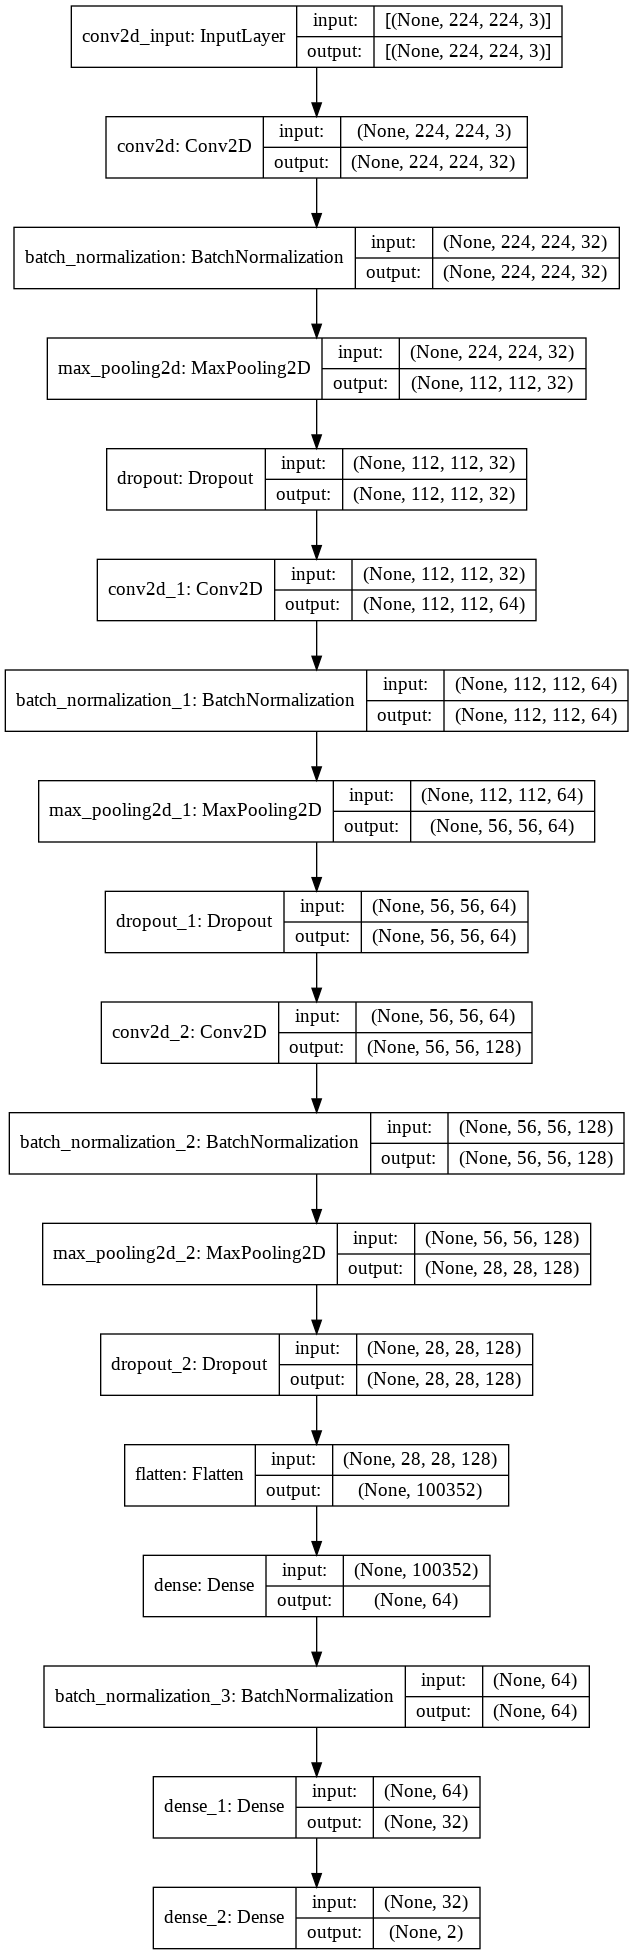

In [ ]:
tf.keras.utils.plot_model(model,
    to_file="CNN1.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,)

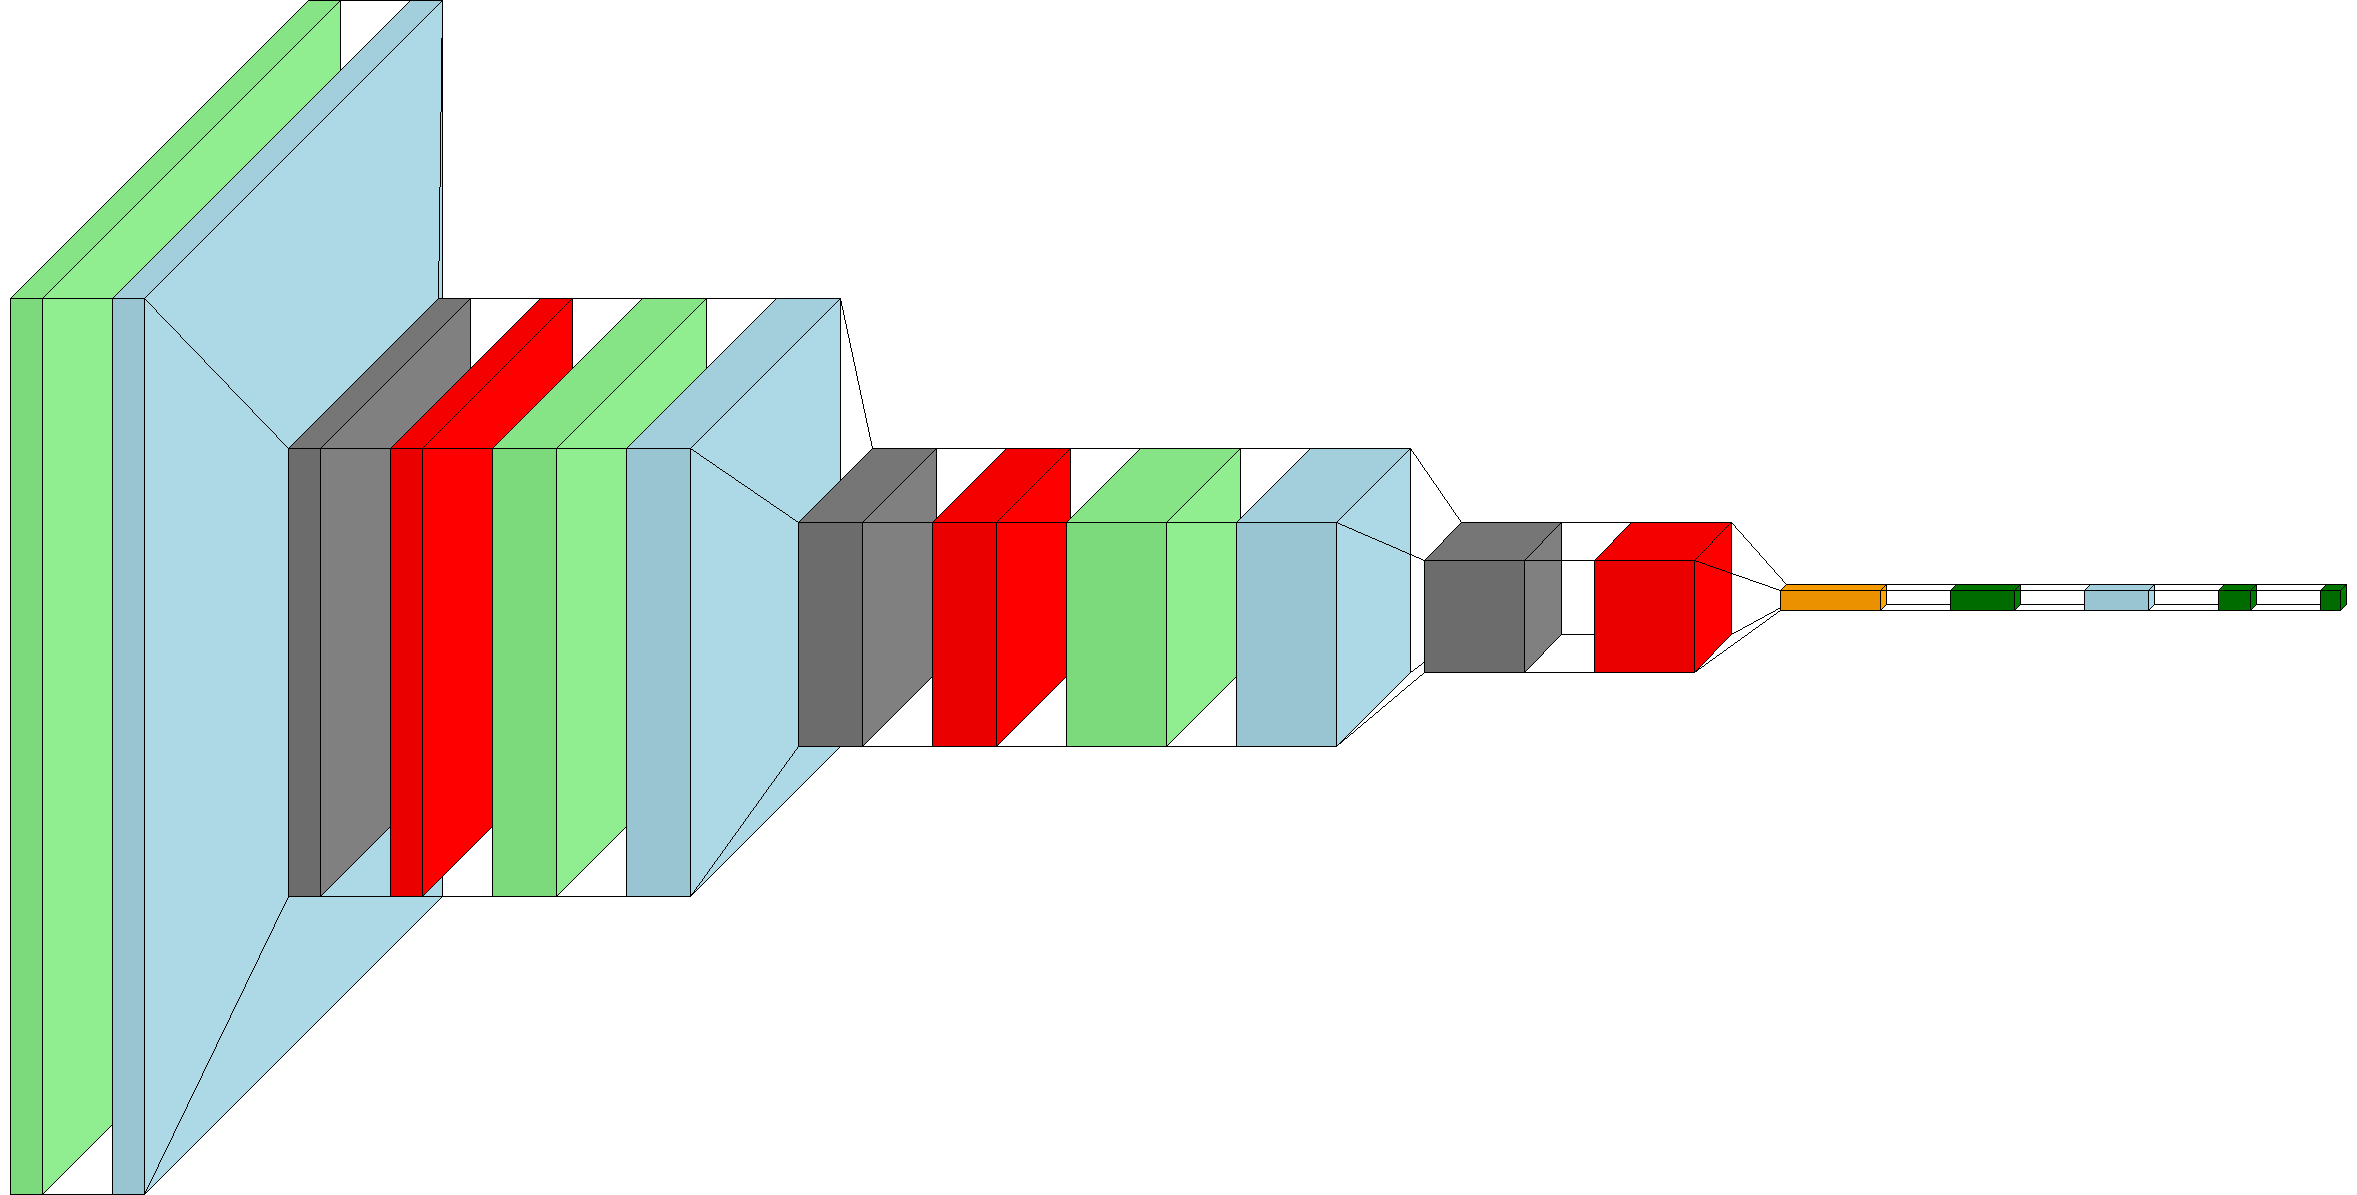

In [ ]:
visualkeras.layered_view(model, spacing=70,color_map=color_map,scale_xy=4, scale_z=1, max_z=100)

###CNN2

In [ ]:
model = CNN2(input_shape=(256, 256, 3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 256, 256, 64)      9472      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 256)      

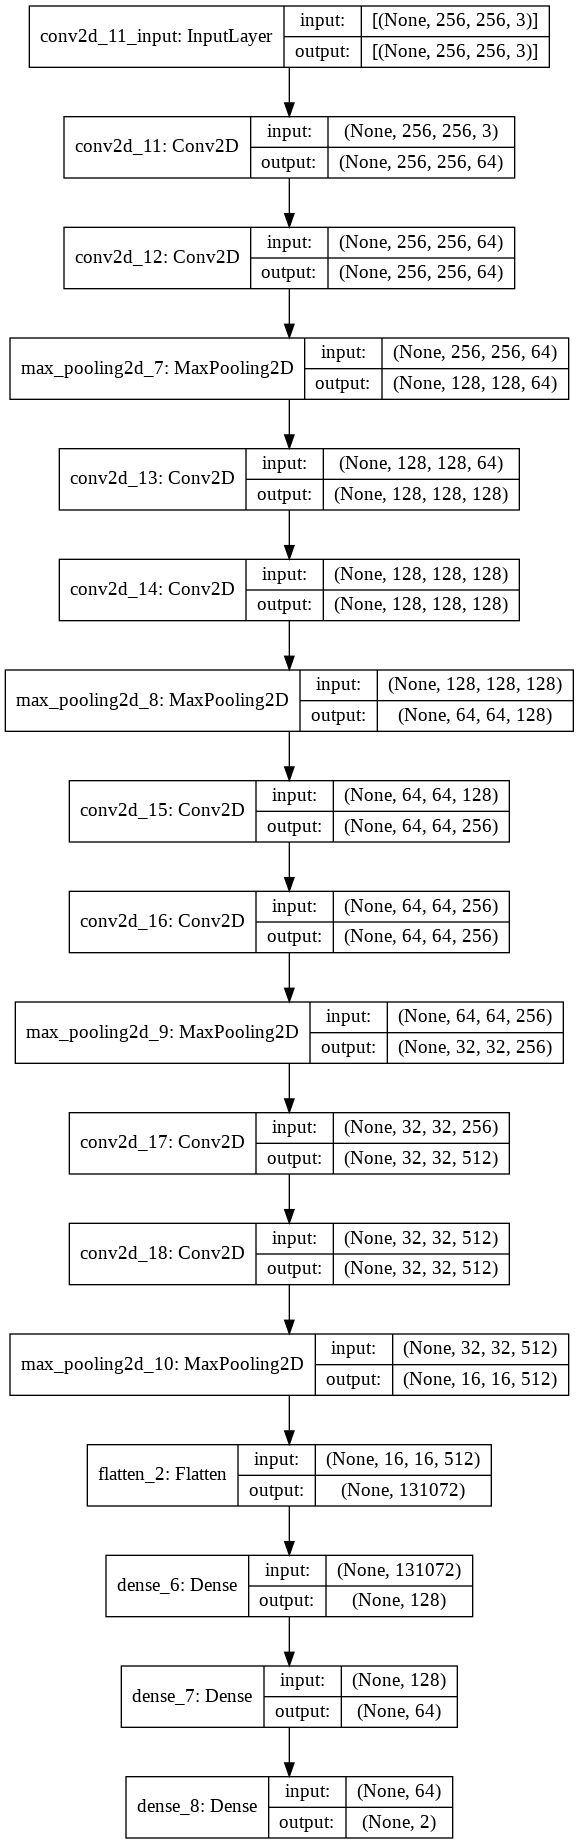

In [ ]:
tf.keras.utils.plot_model(model,
    to_file="CNN2.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,)

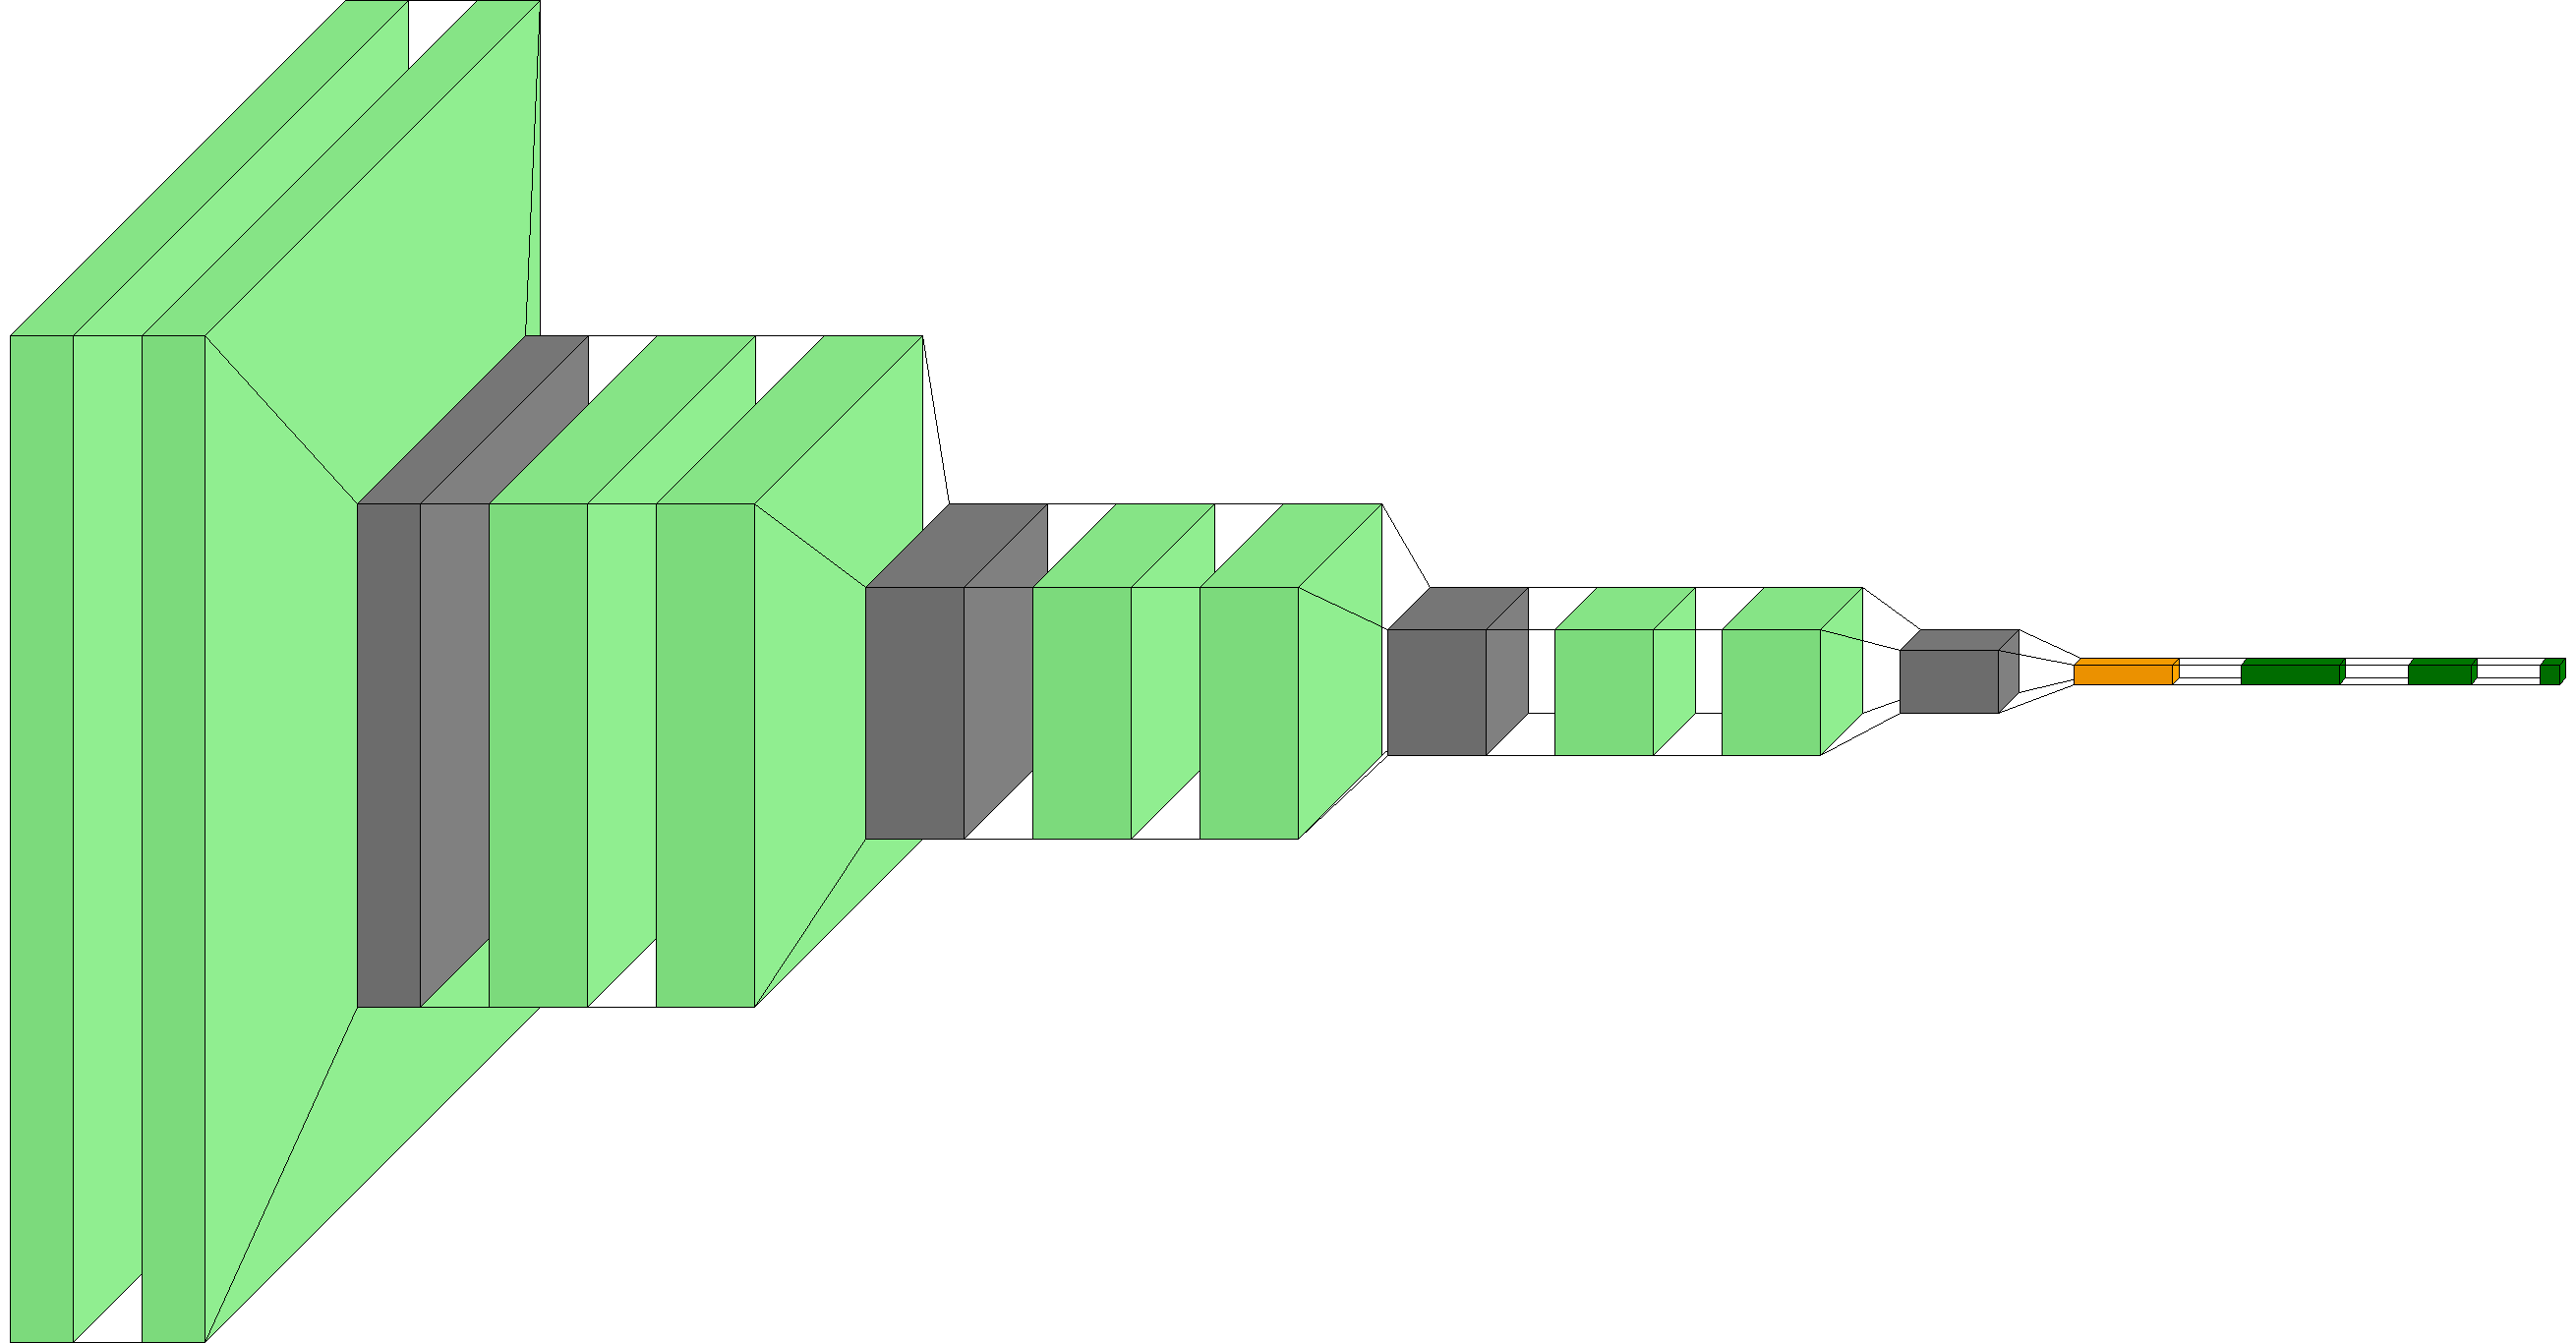

In [ ]:
visualkeras.layered_view(model, spacing=70,color_map=color_map,scale_xy=4, scale_z=1, max_z=100)

###EfficientNetB0

In [ ]:
model = efficientNet(input_shape=(224, 224, 3))
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
normalization_3 (Normalization) (None, 224, 224, 3)  7           rescaling_3[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_3[0][0]            
____________________________________________________________________________________________

###Xception

In [ ]:
model = xception(include_top=False)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

###ResNet18

In [ ]:
model = resnet18(input_shape=(224,224,3))
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 224, 224, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

##Comparing model performance

In [ ]:
epochs=15
train_numbers=10000
val_numbers=800
test_numbers=992
image_size = [(224, 224),(256, 256),(224, 224),(256,256),(224, 224)]
lr = [0.0003, 0.0004, 0.00001,0.0003, 0.001]
batch_size = [32,64,32,16,32]

In [ ]:
model_histories = []
models = [CNN1(input_shape=(224, 224, 3)),
          CNN2(input_shape=(256, 256, 3)),
          efficientNet(input_shape=(224, 224, 3)),resnet18(input_shape=(256,256,3)), 
          xception(include_top=False)]

names = ['CNN1', 'CNN2', 'EfficientnetB0','Xception','ResNet18']

for m,model in enumerate(models):
    """if m != 2:
        continue"""
    # Clear any logs from previous runs
    LOGS_PATH="logs/"+names[m]+"/"
    !rm -rf "$LOGS_PATH"/*
    #load datagen
    train_ds = train_gen.flow_from_directory(train_dir,target_size=image_size[m],shuffle=True, 
                                         batch_size=batch_size[m],seed=42, class_mode='categorical')
    val_ds = val_gen.flow_from_directory(val_dir,target_size=image_size[m],shuffle=True, 
                                        batch_size=batch_size[m],seed=42, class_mode='categorical')
    test_ds = test_gen.flow_from_directory(test_dir,target_size=image_size[m],shuffle=False,
                                        batch_size=batch_size[m], class_mode='categorical')
    ## time mess
    start=time.perf_counter()

    # define log of tensorboard
    logdir = "logs/"+names[m]+"/" + datetime.now().strftime("%Y%m%d-%H%M%S")
    file_writer = tf.summary.create_file_writer(logdir + "/metrics")
    file_writer.set_as_default()
    tensorboard_callback = TensorBoard(log_dir=logdir)
    ## End time mess

    # initiate Adam optimizer
    opt = keras.optimizers.Adam(learning_rate=lr[m])

    # define checkpoint
    checkpoint_filepath = names[m]+'.h5'
    model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                            save_weights_only=False,
                                            monitor='val_loss',
                                            mode='min',
                                            save_best_only=True, 
                                            verbose=1)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')
    Earlystop =EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 5,verbose = 1,
                                             restore_best_weights = True)
    model_histories.append(model.fit_generator(generator=train_ds, 
                                         validation_data=val_ds, epochs=epochs,
                                         callbacks=[Earlystop,tensorboard_callback, model_checkpoint_callback],
                                         steps_per_epoch=train_numbers//batch_size[m], 
                                         validation_steps=val_numbers//batch_size[m]))
    stop=time.perf_counter()
    #model.save(names[m]+'.h5')
    print('{:0.4f} mins elapsed'.format((stop-start)/60))

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
312/312 [==============================] - 114s 364ms/step - loss: 0.1586 - accuracy: 0.9484 - val_loss: 0.3558 - val_accuracy: 0.9525

Epoch 00001: val_loss improved from inf to 0.35583, saving model to CNN1.h5
Epoch 2/15
312/312 [==============================] - 111s 357ms/step - loss: 0.0440 - accuracy: 0.9879 - val_loss: 0.3875 - val_accuracy: 0.9500

Epoch 00002: val_loss did not improve from 0.35583
Epoch 3/15
312/312 [==============================] - 111s 355ms/step - loss: 0.0315 - accuracy: 0.9886 - val_loss: 0.4202 - val_accuracy: 0.9700

Epoch 00003: val_loss did not improve from 0.35583
Epoch 4/15
312/312 [==============================] - 111s 357ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0828 - val_accuracy: 0.9900

Epoch 00004: val_loss improved from 0.35583 to 0.08280, saving model to CNN1.h5
Epoch 5/15
312/312 [==============================] - 111s 354ms/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.0492 - val_accuracy: 0.9925

Epoch 0

###Save and Load history

In [ ]:
names = ['CNN1', 'CNN2', 'EfficientnetB0','ResNet18','Xception']
#save history each model
for i,n in enumerate(names):
    np.save('my_history_'+n+'.npy',model_histories[i].history)

# np.save('my_history_'+n+'.npy',model_histories[0].history) #for save one history alone

In [ ]:
#load and append history each model
hidtory_set = []
for i,n in enumerate(names):
    if i == 4:
        continue
    history_=np.load('my_history_'+n+'.npy',allow_pickle='TRUE').item()
    hidtory_set.append(history_)
    print(len(hidtory_set))

1
2
3
4


In [ ]:
#Load xception his
!unzip /content/tb_logs-20210418T142951Z-001.zip

Archive:  /content/tb_logs-20210418T142951Z-001.zip
  inflating: tb_logs/validation/events.out.tfevents.1618166476.1fd16758d3b3.57.10723.v2  
  inflating: tb_logs/train/events.out.tfevents.1618158761.1fd16758d3b3.57.3154.v2  


In [ ]:
import numpy as np
import tensorflow
import matplotlib.pyplot as plt

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_tensorflow_log(path,path2):

    # Loading too much data is slow...
    tf_size_guidance = {
        'compressedHistograms': 10,
        'images': 0,
        'scalars': 100,
        'histograms': 1
    }

    event_train = EventAccumulator(path, tf_size_guidance)
    event_val = EventAccumulator(path2, tf_size_guidance)
    event_train.Reload()
    event_val.Reload()

    # Show all tags in the log file
    #print(event_acc.Tags())
    result = {'loss':[], 'accuracy':[], 'val_loss':[], 'val_accuracy':[]}
    for key in ['epoch_accuracy','epoch_loss']:
        training_accuracies   = event_train.Scalars(key)
        validation_accuracies = event_val.Scalars(key)

        steps = 8
        x = np.arange(steps)
        y = np.zeros([steps, 2])

        for i in range(steps):
            #print(training_accuracies[i])
            y[i, 0] = training_accuracies[i][2] # acc loss
            y[i, 1] = validation_accuracies[i][2] #valacc valloss
            if 'loss' in key:
                result['loss'].append(training_accuracies[i][2])
                result['val_loss'].append(validation_accuracies[i][2])
            else:
                result['accuracy'].append(training_accuracies[i][2])
                result['val_accuracy'].append(validation_accuracies[i][2])
    

        plt.plot(x, y[:,0], label='training'+key)
        plt.plot(x, y[:,1], label='validation'+key)

        plt.xlabel("Steps")
        plt.ylabel("Accuracy")
        plt.title("Training Progress")
        plt.legend(loc='upper right', frameon=True)
        plt.show()

    return result


log_file_trian = "./tb_logs/train/events.out.tfevents.1618158761.1fd16758d3b3.57.3154.v2"
log_file_val = "./tb_logs/validation/events.out.tfevents.1618166476.1fd16758d3b3.57.10723.v2"
history_xception = plot_tensorflow_log(log_file_trian,log_file_val)

In [ ]:
hidtory_set.append(history_xception)

##Ploting comparison

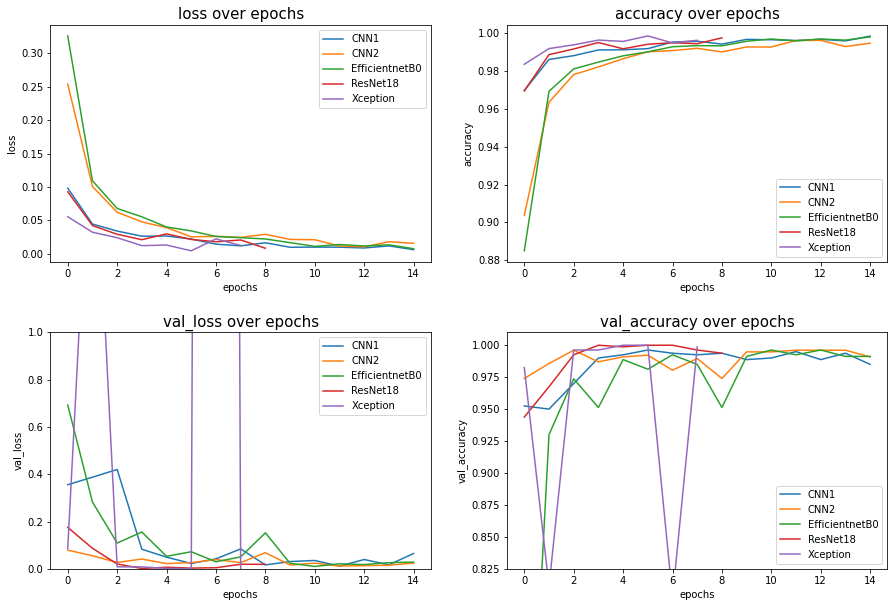

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)
for metric in hidtory_set[0]:
    index = list(hidtory_set[0]).index(metric)
    ax = axes.flatten()[index]
    name_index = 0
    for name_index,history in enumerate(hidtory_set):
        #if name_index != 3:
        ax.plot(history[metric], label=names[name_index])
        name_index += 1
    ax.set_title(metric+' over epochs', size=15)
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    if metric == 'val_loss':
        ax.set_ylim(ymin=0,ymax=1)
    if metric == 'val_accuracy':
        ax.set_ylim(ymin=0.825,ymax=1.01)
    ax.legend()
plt.show()